# Riemann Problem

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit.simdir import SimDir
from kuibit.grid_data import UniformGrid

## Exact Solution

In [2]:
#initial data from the Exact Riemann solver of https://www.brunogiacomazzo.org/?page_id=395
exact = np.loadtxt("Balsara1_exact.dat")

In [3]:
x_exact=exact[:,0]
rho_exact=exact[:,1]
press_exact=exact[:,2] #note: this is pgas+pmag
vx_exact=exact[:,3]
vy_exact=exact[:,4]
vz_exact=exact[:,5]
By_exact=exact[:,6]
Bz_exact=exact[:,7]

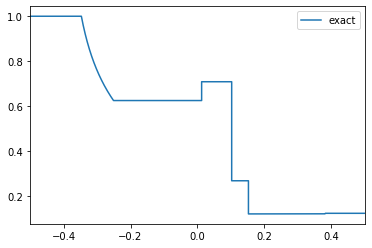

In [4]:
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
#plt.ylim(0.1, 0.3)
plt.legend()
plt.show()

## Read the Numerical Results

In [5]:
gf= SimDir("./balsara1_1d_400").gf
print(gf)


Available grid data of dimension 1D (x): 
['tau', 'Bvec[2]', 'Bcons[2]', 'vel[2]', 'Bvec[1]', 'Bcons[0]', 'Bvec[0]', 'vel[0]', 'eps', 'w_lorentz', 'press', 'scon[2]', 'Bcons[1]', 'scon[1]', 'rho', 'divB', 'scon[0]', 'dens', 'vel[1]']


Available grid data of dimension 1D (y): 
['vel[2]', 'Bvec[1]', 'w_lorentz', 'scon[2]', 'rho', 'Bvec[0]', 'Bcons[1]', 'dens', 'scon[1]', 'vel[1]', 'tau', 'Bcons[0]', 'Bcons[2]', 'eps', 'divB', 'vel[0]', 'Bvec[2]', 'scon[0]', 'press']


Available grid data of dimension 1D (z): 
['Bcons[0]', 'vel[0]', 'vel[1]', 'Bcons[2]', 'divB', 'tau', 'Bcons[1]', 'Bvec[1]', 'vel[2]', 'press', 'rho', 'Bvec[0]', 'scon[1]', 'scon[2]', 'scon[0]', 'eps', 'w_lorentz', 'dens', 'Bvec[2]']


Available grid data of dimension 2D (xy): 
[]


Available grid data of dimension 2D (xz): 
[]


Available grid data of dimension 2D (yz): 
[]


Available grid data of dimension 3D (xyz): 
[]



In [6]:
vars1d=gf.x
print(vars1d)


Available grid data of dimension 1D (x): 
['tau', 'Bvec[2]', 'Bcons[2]', 'vel[2]', 'Bvec[1]', 'Bcons[0]', 'Bvec[0]', 'vel[0]', 'eps', 'w_lorentz', 'press', 'scon[2]', 'Bcons[1]', 'scon[1]', 'rho', 'divB', 'scon[0]', 'dens', 'vel[1]']



In [7]:
rho=vars1d.fields.rho

## Kuibit Standard Methods for Plots

We create a uniform grid and plot the data on it. Kuibit indeed assumes that data were produced on a grid with several meshes (AMR). In our case the grid was already uniform, so later we will see an alternative way to plot the data without interpolating them on a new grid.

In [8]:
small_grid = UniformGrid([101], x0=[-0.4], x1=[0.4])

In [9]:
print(rho.iterations)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [10]:
rho_final = rho.read_on_grid(200, small_grid)

In [11]:
print(*rho_final.coordinates_meshgrid())

[-0.4   -0.392 -0.384 -0.376 -0.368 -0.36  -0.352 -0.344 -0.336 -0.328
 -0.32  -0.312 -0.304 -0.296 -0.288 -0.28  -0.272 -0.264 -0.256 -0.248
 -0.24  -0.232 -0.224 -0.216 -0.208 -0.2   -0.192 -0.184 -0.176 -0.168
 -0.16  -0.152 -0.144 -0.136 -0.128 -0.12  -0.112 -0.104 -0.096 -0.088
 -0.08  -0.072 -0.064 -0.056 -0.048 -0.04  -0.032 -0.024 -0.016 -0.008
  0.     0.008  0.016  0.024  0.032  0.04   0.048  0.056  0.064  0.072
  0.08   0.088  0.096  0.104  0.112  0.12   0.128  0.136  0.144  0.152
  0.16   0.168  0.176  0.184  0.192  0.2    0.208  0.216  0.224  0.232
  0.24   0.248  0.256  0.264  0.272  0.28   0.288  0.296  0.304  0.312
  0.32   0.328  0.336  0.344  0.352  0.36   0.368  0.376  0.384  0.392
  0.4  ]


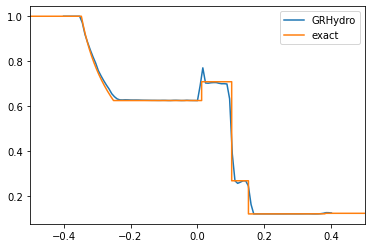

In [12]:
plt.plot(*rho_final.coordinates_meshgrid(), rho_final.data_xyz, label="GRHydro")
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
#plt.ylim(0.1, 0.3)
plt.legend()
plt.show()

## Alternative Method
This method can only be used with simulations that used only one refinement level (i.e., a uniform grid) and using only 1 MPI process.

In [13]:
#[iterazione][refinement level][component number]
rho[0][0][0].data

array([1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   ,

In [14]:
rho[0][0][0].coordinates()[0].data

array([-0.4925, -0.49  , -0.4875, -0.485 , -0.4825, -0.48  , -0.4775,
       -0.475 , -0.4725, -0.47  , -0.4675, -0.465 , -0.4625, -0.46  ,
       -0.4575, -0.455 , -0.4525, -0.45  , -0.4475, -0.445 , -0.4425,
       -0.44  , -0.4375, -0.435 , -0.4325, -0.43  , -0.4275, -0.425 ,
       -0.4225, -0.42  , -0.4175, -0.415 , -0.4125, -0.41  , -0.4075,
       -0.405 , -0.4025, -0.4   , -0.3975, -0.395 , -0.3925, -0.39  ,
       -0.3875, -0.385 , -0.3825, -0.38  , -0.3775, -0.375 , -0.3725,
       -0.37  , -0.3675, -0.365 , -0.3625, -0.36  , -0.3575, -0.355 ,
       -0.3525, -0.35  , -0.3475, -0.345 , -0.3425, -0.34  , -0.3375,
       -0.335 , -0.3325, -0.33  , -0.3275, -0.325 , -0.3225, -0.32  ,
       -0.3175, -0.315 , -0.3125, -0.31  , -0.3075, -0.305 , -0.3025,
       -0.3   , -0.2975, -0.295 , -0.2925, -0.29  , -0.2875, -0.285 ,
       -0.2825, -0.28  , -0.2775, -0.275 , -0.2725, -0.27  , -0.2675,
       -0.265 , -0.2625, -0.26  , -0.2575, -0.255 , -0.2525, -0.25  ,
       -0.2475, -0.2

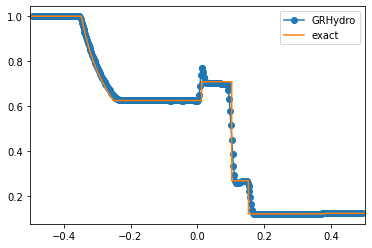

In [15]:
plt.plot(rho[200][0][0].coordinates()[0].data,rho[200][0][0].data, label="GRHydro", marker='o')
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.legend()
plt.show()